<a href="https://colab.research.google.com/github/tntnu/-/blob/main/%5B%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4%5D_%EB%8B%B9%EB%87%A8%EB%B3%91%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [ ]:
import pandas as pd
df = pd.read_csv("diabetes_data.csv")

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, stratify = df['Diabetes'], random_state = 42)

변수 설명

* Age : 18~24 = 1, 25 ~ 29 = 2, 30 ~ 34 = 3, 35 ~ 39 =4, 40 ~ 44 =5, 45 ~ 49 = 6, 50 ~ 54 = 7, 55 ~ 59 = 8, 60 ~ 64 = 9, 65 ~ 69 = 10, 70 ~ 74 = 11, 75 ~ 79 = 12, 80이상 = 13
* Sex : male = 1, female = 0
* HighChol : high cholesterol = 1, no high cholesterol = 0
* CholCheck : 5년 이내 콜레스테롤 검사함 = 1, 검사 안함 = 0
* BMI : 체질량 지수로 비만의 정도를 나타냄, 몸무게(kg) / 신장(m)^2
* Smoker : 살면서 담배 100개비(5갑) 핀 경우 = 1, 안 핀 경우 = 0
* HeartDiseaseorAttack : 심근경색이나 심장병 있는 경우 = 1, 없는 경우 = 0
* PhysActivity : 일을 제외하고 지난 30일간 신체적 활동인 있는 경우 = 1, 없는 경우 = 0
* Frutis : 하루에 한 개 이상의 과일을 섭취하는 경우 = 1, 그렇지 않는 경우 = 0
* Veggies : 하루에 한 개 이상의 채소를 섭취하는 경우 = 1, 그렇지 않는 경우 = 0
* HvyAlcoholConsump : 남자(14잔 이상), 여자(7잔 이상) 매주 해당 수치 이상 마시는 경우 = 1, 아닌 경우 = 0
* GenHlth : 주관적인 개인 건강 상태 excellent = 1, very good = 2, good = 3, fair = 4, poor = 5
* MentHlth : 정신 상태가 좋은 않은 날 1~30일
* PhysHlth : 몸 상태(병 or 상처)가 좋지 않은 날 1~30일
* DiffWalk : 걷거나 계단 오르기 힘든 경우 = 1, 그렇지 않은 경우 = 0
* Stroke : 뇌졸증이 있는 경우 = 1, 없는 경우 = 0
* HighBP : 고혈압이 있는 경우 = 1, 없는 경우 = 0
* Diabetes : 당뇨병이 있는 경우 = 1, 없는 경우 = 0



데이터 설명
* 하나의 데이터를 train, test로 분할 (8:2)  


데이터 형태  
* train.shape (56553, 18)
* test.shape (14139, 18)
* 독립변수 17개
* 결측치 없음
* 종속변수 양성 28277, 음성 28276으로 균형 데이터

EDA 단계 인사이트 도출
- HighChol, GenHlth, DiffWalk, HighBP,Age, BMI,  MentHlth, PhysHlth변수가 당뇨에 유의미한 영향을 미침
- 콜레스테롤이 높을수록, 주관적으로 개인 건강 상태가 나쁘다고 생각할수록, 걷거나 계단 오르기 힘든 경우, 고혈압이 있는 경우, Age, BMI, MentHlth, PhysHlth 클수록  당뇨병이 있을 확률이 높다.

필요한 데이터 전처리
* Age(37%), BMI(45%), MentHlth(24%), PhysHlth(24%) 이상치 비율 10이상으로 로그 변환 필요
* 로그 변환 : 이상치 영향을 줄이고 분포를 완화해줌

### 1차
* 어떠한 데이터 전처리도 하지 않고 기본 랜덤포레스트 모델 사용


In [ ]:
# 독립변수, 종속변수 분할
feature = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP']

X = train[feature]
y = train['Diabetes']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
print(f"모델 정확도 : {accuracy : .4f}")

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
roc = roc_auc_score(y_val, y_proba)
f1_score = f1_score(y_val, y_pred)
print(cm)
print(cr)
print(f" roc_auc : {roc : .4f}")
print(f" 전체 모델 f1-score : {f1_score : .4f}")

모델 정확도 :  0.7243
[[3850 1739]
 [1380 4342]]
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      5589
         1.0       0.71      0.76      0.74      5722

    accuracy                           0.72     11311
   macro avg       0.73      0.72      0.72     11311
weighted avg       0.72      0.72      0.72     11311

 roc :  0.7931
 전체 모델 f1-score :  0.7357


In [ ]:
# 로지스틱 회귀 분석, 스케일링 StandardScaler
# 독립변수, 종속변수 분할
feature = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP']

X = train[feature]
y = train['Diabetes']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 모델 불러오기
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
print(f"모델 정확도 : {accuracy : .4f}")

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
roc = roc_auc_score(y_val, y_proba)
f1_score = f1_score(y_val, y_pred)
print(cm)
print(cr)
print(f" roc_auc : {roc : .4f}")
print(f" 전체 모델 f1-score : {f1_score : .4f}")

모델 정확도 :  0.7464
[[4066 1523]
 [1345 4377]]
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      5589
         1.0       0.74      0.76      0.75      5722

    accuracy                           0.75     11311
   macro avg       0.75      0.75      0.75     11311
weighted avg       0.75      0.75      0.75     11311

 roc_auc :  0.8262
 전체 모델 f1-score :  0.7532


In [ ]:
# 로지스틱 회귀 분석, 스케일링 MInMaxScaler
# 독립변수, 종속변수 분할
feature = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP']

X = train[feature]
y = train['Diabetes']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 모델 불러오기
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)

# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
print(f"모델 정확도 : {accuracy : .4f}")

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
roc = roc_auc_score(y_val, y_proba)
f1_score = f1_score(y_val, y_pred)
print(cm)
print(cr)
print(f" roc_auc : {roc : .4f}")
print(f" 전체 모델 f1-score : {f1_score : .4f}")

모델 정확도 :  0.7468
[[4068 1521]
 [1343 4379]]
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      5589
         1.0       0.74      0.77      0.75      5722

    accuracy                           0.75     11311
   macro avg       0.75      0.75      0.75     11311
weighted avg       0.75      0.75      0.75     11311

 roc_auc :  0.8262
 전체 모델 f1-score :  0.7536


### 2차
* 중요하지 않은 변수 제거를 위해 로지스틱 회귀 계수를 확인하여 절대값 0.05미만인 변수 제거
- 사용 변수 : 'GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth', 'DiffWalk']
*  독립변수 : 17 -> 11개
- 사용 모델 : 로지스틱 회귀 기본 모델

In [ ]:
# 전체 변수 로지스틱 회귀 계수 확인

coef_df = pd.DataFrame({
    'Feature' : feature,
    'Coefficient' : model.coef_[0]
})

codf_df = coef_df.sort_values('Coefficient', ascending = False)
codf_df

,Feature,Coefficient
11,GenHlth,0.689721
4,BMI,0.539369
0,Age,0.451899
16,HighBP,0.365219
2,HighChol,0.304628
3,CholCheck,0.192899
1,Sex,0.103355
6,HeartDiseaseorAttack,0.089551
14,DiffWalk,0.067157
15,Stroke,0.038766


In [ ]:
# 전체 변수 로지스틱 회귀 계수 절대값으 확인

coef_abs_df = pd.DataFrame({
    'Feature' : feature,
    'Coefficient' : abs(model.coef_[0])
})

coef_abs_df = coef_abs_df.sort_values('Coefficient', ascending = False)
coef_abs_df

,Feature,Coefficient
11,GenHlth,0.689721
4,BMI,0.539369
0,Age,0.451899
16,HighBP,0.365219
2,HighChol,0.304628
3,CholCheck,0.192899
10,HvyAlcoholConsump,0.153067
1,Sex,0.103355
6,HeartDiseaseorAttack,0.089551
13,PhysHlth,0.088872


In [ ]:
coef_abs_df.loc[coef_abs_df['Coefficient'] >= 0.05].reset_index(drop = True)

,Feature,Coefficient
0,GenHlth,0.689721
1,BMI,0.539369
2,Age,0.451899
3,HighBP,0.365219
4,HighChol,0.304628
5,CholCheck,0.192899
6,HvyAlcoholConsump,0.153067
7,Sex,0.103355
8,HeartDiseaseorAttack,0.089551
9,PhysHlth,0.088872


In [ ]:
coef_abs_df.loc[coef_abs_df['Coefficient'] >= 0.05].reset_index(drop = True)['Feature'].values

array(['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
       'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
       'DiffWalk'], dtype=object)

In [ ]:
top_coef_df = coef_abs_df.loc[coef_abs_df['Coefficient'] >= 0.05]
top_coef_df

,Feature,Coefficient
11,GenHlth,0.689721
4,BMI,0.539369
0,Age,0.451899
16,HighBP,0.365219
2,HighChol,0.304628
3,CholCheck,0.192899
10,HvyAlcoholConsump,0.153067
1,Sex,0.103355
6,HeartDiseaseorAttack,0.089551
13,PhysHlth,0.088872


In [ ]:
# 독리변수, 종속변수 분할
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
       'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
       'DiffWalk']

X = train[feature]
y = train['Diabetes']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 모델 불러오기
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)

# 모델 학습
model.fit(X_train,y_train)

# 모델 예측
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
roc = roc_auc_score(y_val, y_proba)
f1_score = f1_score(y_val, y_pred)

print(cm)
print(cr)
print(f"모델 정확도 : {accuracy : .4f}")
print(f" roc_auc : {roc : .4f}")
print(f" 전체 모델 f1-score : {f1_score : .4f}")

[[4064 1525]
 [1351 4371]]
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      5589
         1.0       0.74      0.76      0.75      5722

    accuracy                           0.75     11311
   macro avg       0.75      0.75      0.75     11311
weighted avg       0.75      0.75      0.75     11311

모델 정확도 :  0.7457
 roc_auc :  0.8259
 전체 모델 f1-score :  0.7525


### 2차 모델 해석

/tmp/ipython-input-50-4119641527.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_coef_df, x = 'Coefficient', y = 'Feature', palette = 'rocket')


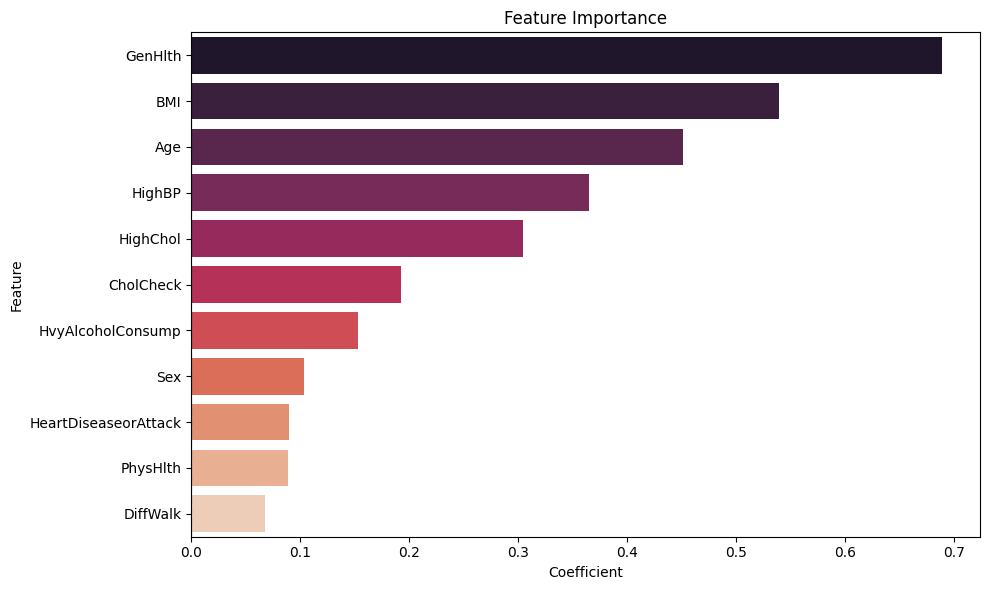

In [ ]:
# 변수 중요도 시각화 (회귀 계수 시각화)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.barplot(data = top_coef_df, x = 'Coefficient', y = 'Feature', palette = 'rocket')
plt.title('Feature Importance')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


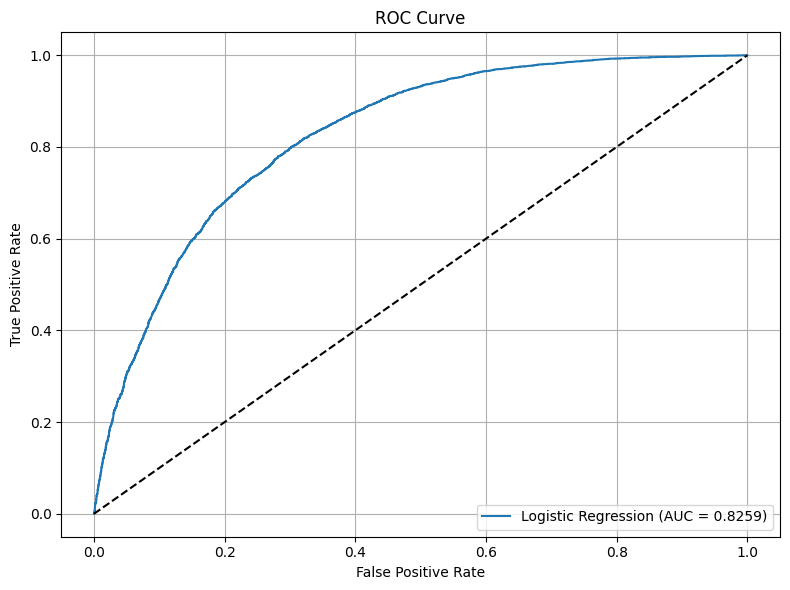

In [ ]:
# ROC Curve 시각화

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3차
- 성능 향상을 위하여 로지스틱 회귀 모델 하이퍼파라미터 튜닝
- 사용 변수 : 'GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth', 'DiffWalk' 11개
- 사용 모델 : 로지스틱 회귀 모델 하이퍼파라미터 튜닝

In [ ]:
# 독립변수, 종속변수 분할
feature = feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
       'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
       'DiffWalk']

X = train[feature]
y = train['Diabetes']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 정규화 강도
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']     # l1 penalty는 liblinear 또는 saga만 지원
}

grid = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# 최적 모델 정보 출력
print("Best params:", grid.best_params_)
print("Best ROC AUC:", grid.best_score_)

# 테스트셋에서 성능 평가
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score

best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)
y_proba = best_model.predict_proba(X_val)[:, 1]
f1_score = f1_score(y_val, y_pred)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("roc_auc:", round(roc_auc_score(y_val, y_proba), 4))
print(f" 전체 모델 f1-score : {f1_score : .4f}")

Best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC: 0.8232185656206716
[[4064 1525]
 [1355 4367]]
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      5589
         1.0       0.74      0.76      0.75      5722

    accuracy                           0.75     11311
   macro avg       0.75      0.75      0.75     11311
weighted avg       0.75      0.75      0.75     11311

roc_auc: 0.8259
 전체 모델 f1-score :  0.7520


### 4차
- 선형 모델의 한계를 극복하기 위하여 다항 특성 추가한 로지스틱 회귀 모델 생성
- 사용 변수 : 'GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth', 'DiffWalk'] 11개
- 사용 모델 : 로지스틱 회귀 기본 모델

In [ ]:
# 독립변수, 종속변수 분할
feature = feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
       'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
       'DiffWalk']

X = train[feature]
y = train['Diabetes']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score

# 파이프라인 생성
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter = 1000, random_state=42))
])

# 모델 학습
pipe.fit(X_train, y_train)

# 모델 예측
y_pred = pipe.predict(X_val)
y_proba = pipe.predict_proba(X_val)[:, 1]
f1_score = f1_score(y_val, y_pred)

# 평가 출력
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("ROC AUC:", round(roc_auc_score(y_val, y_proba), 4))
print(f"전체 모델 f1-score : {f1_score : .4f}")

[[3998 1591]
 [1192 4530]]
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      5589
         1.0       0.74      0.79      0.77      5722

    accuracy                           0.75     11311
   macro avg       0.76      0.75      0.75     11311
weighted avg       0.76      0.75      0.75     11311

ROC AUC: 0.8317
전체 모델 f1-score :  0.7650


### 5차


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, recall_score, f1_score

# 1. 변수 및 데이터 분할
features = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
            'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
            'DiffWalk']

X = train[features]
y = train['Diabetes']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 파이프라인 정의 (다항특성 + 스케일링 + 로지스틱회귀)
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# 3. 하이퍼파라미터 그리드 설정
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'saga']  # lbfgs와 saga는 l2 penalty 지원
}

# 4. GridSearchCV 객체 생성
grid = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# 5. 모델 학습
grid.fit(X_train, y_train)

# 6. 최적 파라미터 및 점수 출력
print("Best params:", grid.best_params_)
print("Best ROC AUC (CV):", grid.best_score_)

# 7. 검증 세트 평가
best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)
y_proba = best_model.predict_proba(X_val)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

pos_recall = recall_score(y_val, y_pred, pos_label=1)
f1 = f1_score(y_val, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_val, y_proba)

print(f"Positive Class Recall: {pos_recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Best params: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best ROC AUC (CV): 0.828663463786685

Confusion Matrix:
[[3997 1592]
 [1193 4529]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      5589
         1.0       0.74      0.79      0.76      5722

    accuracy                           0.75     11311
   macro avg       0.76      0.75      0.75     11311
weighted avg       0.75      0.75      0.75     11311

Positive Class Recall: 0.7915
F1 Score: 0.7648
ROC AUC: 0.8317


### 6차
- **L1 규제**를 사용해 중요하지 않은 특성의 계수를 **0으로 수축**시키고, `SelectFromModel`을 이용해 **중요한 특성만 남겨서 학습**
- 사용 변수 : BMI, Age, HighBP, HighChol, HeartDiseaseorAttack, DiffWalk, GenHlth Age, GenHlth HighBP, GenHlth Sex, GenHlth HeartDiseaseorAttack, GenHlth PhysHlth, GenHlth DiffWalk, BMI^2, BMI Age, BMI CholCheck, Age^2, Age HighChol, Age Sex, Age HeartDiseaseorAttack, HighBP^2, HighChol^2, HeartDiseaseorAttack^2, PhysHlth^2 (24개)
- 사용 모델 : L1 규제 기반

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score

# 독립변수 및 종속변수 정의
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth', 'DiffWalk']

X = train[feature]
y = train['Diabetes']

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인: 다항 특성 + 정규화 + L1 규제 로지스틱 회귀
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# L1 규제로 중요 특성 선택
l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42, max_iter=1000)
selector = SelectFromModel(estimator=l1_model, threshold='mean')  # 평균 이상만 선택
selector.fit(X_train_scaled, y_train)

# 선택된 특성만 추출
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)

# 최종 로지스틱 회귀 모델 학습 (선택된 특성만 사용)
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_train_selected, y_train)

# 평가
y_pred = final_model.predict(X_val_selected)
y_proba = final_model.predict_proba(X_val_selected)[:, 1]
f1_score = f1_score(y_val, y_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("ROC AUC:", round(roc_auc_score(y_val, y_proba), 4))
print(f"전체 모델 f1-score : {f1_score : .4f}")


Confusion Matrix:
[[4000 1589]
 [1217 4505]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      5589
         1.0       0.74      0.79      0.76      5722

    accuracy                           0.75     11311
   macro avg       0.75      0.75      0.75     11311
weighted avg       0.75      0.75      0.75     11311

ROC AUC: 0.8294
전체 모델 f1-score :  0.7625


In [ ]:
# 어떤 특성이 선택됐는지 확인
selected_mask = selector.get_support()
selected_features = poly.get_feature_names_out(feature)[selected_mask]

print("선택된 특성 개수:", len(selected_features))
print("선택된 특성 목록:")
for feat in selected_features:
    print(feat)


선택된 특성 개수: 24
선택된 특성 목록:
GenHlth
BMI
Age
HighBP
HighChol
HeartDiseaseorAttack
DiffWalk
GenHlth Age
GenHlth HighBP
GenHlth Sex
GenHlth HeartDiseaseorAttack
GenHlth PhysHlth
GenHlth DiffWalk
BMI^2
BMI Age
BMI CholCheck
Age^2
Age HighChol
Age Sex
Age HeartDiseaseorAttack
HighBP^2
HighChol^2
HeartDiseaseorAttack^2
PhysHlth^2


### 7차
* 다항 특성을 포함한 전체 변수에서 회귀계수 0.05를 기준으로 이상인 변수만 사용해서 로지스틱 회귀 기본 모델 시도

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score

# 1. 데이터 분할
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 다항 특성 + 정규화
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 3. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 4. 계수 기준으로 중요한 특성 선택 (절댓값 ≥ 0.05)
feature_names = poly.get_feature_names_out(input_features=feature)
coef = model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# 5. 선택된 특성으로 모델 재학습
selected_model = LogisticRegression(max_iter=1000, random_state=42)
selected_model.fit(X_train_selected, y_train)

# 6. 성능 평가
y_pred = selected_model.predict(X_val_selected)
y_proba = selected_model.predict_proba(X_val_selected)[:, 1]
f1_score = f1_score(y_val, y_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("ROC AUC:", round(roc_auc_score(y_val, y_proba), 4))
print(f"전체 모델 f1-score : {f1_score : .4f}")


Confusion Matrix:
[[3990 1599]
 [1184 4538]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      5589
         1.0       0.74      0.79      0.77      5722

    accuracy                           0.75     11311
   macro avg       0.76      0.75      0.75     11311
weighted avg       0.76      0.75      0.75     11311

ROC AUC: 0.8317
전체 모델 f1-score :  0.7653


In [ ]:
selected_features = np.array(feature_names)[important_idx]
print("선택된 특성 개수:", len(selected_features))
print("선택된 특성:\n", selected_features)


선택된 특성 개수: 56
선택된 특성:
 ['GenHlth' 'BMI' 'Age' 'HighBP' 'HighChol' 'CholCheck' 'HvyAlcoholConsump'
 'HeartDiseaseorAttack' 'PhysHlth' 'DiffWalk' 'GenHlth^2' 'GenHlth BMI'
 'GenHlth Age' 'GenHlth HighBP' 'GenHlth Sex'
 'GenHlth HeartDiseaseorAttack' 'GenHlth PhysHlth' 'GenHlth DiffWalk'
 'BMI^2' 'BMI Age' 'BMI HighChol' 'BMI CholCheck' 'BMI Sex' 'BMI PhysHlth'
 'BMI DiffWalk' 'Age^2' 'Age HighBP' 'Age HighChol' 'Age CholCheck'
 'Age HvyAlcoholConsump' 'Age Sex' 'Age HeartDiseaseorAttack'
 'Age DiffWalk' 'HighBP^2' 'HighBP HighChol' 'HighBP CholCheck'
 'HighBP Sex' 'HighBP HeartDiseaseorAttack' 'HighBP DiffWalk' 'HighChol^2'
 'HighChol CholCheck' 'HighChol Sex' 'HighChol HeartDiseaseorAttack'
 'HighChol DiffWalk' 'CholCheck^2' 'CholCheck HvyAlcoholConsump'
 'CholCheck Sex' 'CholCheck HeartDiseaseorAttack' 'CholCheck PhysHlth'
 'CholCheck DiffWalk' 'HvyAlcoholConsump^2' 'HvyAlcoholConsump Sex'
 'HeartDiseaseorAttack^2' 'HeartDiseaseorAttack DiffWalk' 'PhysHlth^2'
 'DiffWalk^2']


### 8차
* 다항 특성을 포함한 전체 변수에서 회귀계수를 내림차순으로 정렬했을 때 top 7개 변수만 출력해서 로지스틱 회귀 기본 모델 시도

In [ ]:
# 독리변수, 종속변수 분할
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'HeartDiseaseorAttack', 'DiffWalk']


X = train[feature]
y = train['Diabetes']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 모델 불러오기
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)

# 모델 학습
model.fit(X_train,y_train)

# 모델 예측
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
roc = roc_auc_score(y_val, y_proba)
f1_score = f1_score(y_val, y_pred)

print(cm)
print(cr)
print(f"모델 정확도 : {accuracy : .4f}")
print(f"roc : {roc : .4f}")
print(f"전체 모델 f1-score : {f1_score : .4f}")

[[4063 1526]
 [1374 4348]]
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      5589
         1.0       0.74      0.76      0.75      5722

    accuracy                           0.74     11311
   macro avg       0.74      0.74      0.74     11311
weighted avg       0.74      0.74      0.74     11311

모델 정확도 :  0.7436
roc :  0.8206
전체 모델 f1-score :  0.7499


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.2 MB/s eta 0:00:00


### 9차
* 중요하지 않은 변수 제거를 위해 로지스틱 회귀 계수를 확인하여 절대값 0.05미만인 변수 제거
- 사용 변수 : 'GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth', 'DiffWalk' 11개
- 사용 모델 : 랜덤포레스트 + optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# 데이터 준비 (train 데이터가 이미 있다고 가정)
features = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
            'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth', 'DiffWalk']

X = train[features]
y = train['Diabetes']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # 하이퍼파라미터 샘플링
    n_estimators = trial.suggest_int('n_estimators', 200, 600)
    max_depth = trial.suggest_categorical('max_depth', [10, 20, 30, None])
    min_samples_split = trial.suggest_categorical('min_samples_split', [2, 5, 10])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2, 4])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_proba)

    return roc_auc

# 스터디 생성 및 최적화
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40, n_jobs=1)

print("Best trial:")
trial = study.best_trial

print(f"  ROC AUC: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-07-12 14:50:06,470] A new study created in memory with name: no-name-2ce83917-2f04-4987-bdcb-376e12154f50
[I 2025-07-12 14:50:26,958] Trial 0 finished with value: 0.8093544617432418 and parameters: {'n_estimators': 576, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8093544617432418.
[I 2025-07-12 14:50:43,865] Trial 1 finished with value: 0.7807995795406029 and parameters: {'n_estimators': 451, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.8093544617432418.
[I 2025-07-12 14:50:57,850] Trial 2 finished with value: 0.810217025140948 and parameters: {'n_estimators': 466, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.810217025140948.
[I 2025-07-12 14:51:07,938] Trial 3 finished with value: 0.8159878041008924 and parameters: {'n_estimators': 338, 'max_depth': 3

Best trial:
  ROC AUC: 0.8293199198080266
  Params: 
    n_estimators: 247
    max_depth: 10
    min_samples_split: 10
    min_samples_leaf: 1
    max_features: log2


### 10차
* 다항 특성을 추가한 전체 변수인 경우 로지스틱 회귀 모델의 성능이 가장 좋았음(하이퍼파라미터 튜닝 상관없이 성능 동일)
* 사용 변수 : 다항 특성을 추가한 전체 변수
* 사용 모델 : 로지스틱 회귀 모델 + optuna

In [ ]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

# 데이터 준비 (기존과 동일)
features = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
            'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
            'DiffWalk']

X = train[features]
y = train['Diabetes']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # 하이퍼파라미터 샘플링
    degree = trial.suggest_int('degree', 1, 3)  # 다항 차수 1~3
    C = trial.suggest_loguniform('C', 1e-3, 10)  # 규제 강도 (역수)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])

    # Pipeline 정의
    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(
            C=C,
            penalty='l2',
            solver=solver,
            max_iter=1000,
            random_state=42))
    ])

    # cross_val_score로 ROC AUC 평가 (5-fold)
    score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

    return np.mean(score)

# 스터디 생성 및 최적화
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)

print("Best trial:")
trial = study.best_trial
print(f"  ROC AUC: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# 최적 모델로 학습 후 검증 세트 평가
best_params = trial.params
best_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_params['degree'], include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        C=best_params['C'],
        penalty='l2',
        solver=best_params['solver'],
        max_iter=1000,
        random_state=42))
])
best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_val)
y_proba = best_pipe.predict_proba(X_val)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score, roc_auc_score
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print(f"Positive Class Recall: {recall_score(y_val, y_pred, pos_label=1):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred, pos_label=1):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, y_proba):.4f}")


[I 2025-07-12 14:59:08,203] A new study created in memory with name: no-name-972203d9-8bc6-4ea4-af86-5d96a18a8546
/tmp/ipython-input-9-3464615550.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 10)  # 규제 강도 (역수)
[I 2025-07-12 15:21:01,777] Trial 0 finished with value: 0.8278560786567407 and parameters: {'degree': 3, 'C': 0.7256223135579017, 'solver': 'saga'}. Best is trial 0 with value: 0.8278560786567407.
/tmp/ipython-input-9-3464615550.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 10)  # 규제 강도 (역수)
[I 2025-07-12 15:21:24,764] Trial 1 finished with value: 0.8284895128212781 and 

Best trial:
  ROC AUC: 0.8286713094179131
  Params:
    degree: 2
    C: 1.8972466274539876
    solver: lbfgs

Confusion Matrix:
[[3997 1592]
 [1192 4530]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      5589
         1.0       0.74      0.79      0.76      5722

    accuracy                           0.75     11311
   macro avg       0.76      0.75      0.75     11311
weighted avg       0.75      0.75      0.75     11311

Positive Class Recall: 0.7917
F1 Score: 0.7649
ROC AUC: 0.8317


### 11차
* 7차가 가장 성능이 좋아서 해당 모델 + optuna 하이퍼파라미터 튜닝
* 사용 모델 : 로지스틱 회귀 모델

In [ ]:
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    classification_report,
    f1_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. 데이터 전처리
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 처음 모델로 중요 특성 추출
base_model = LogisticRegression(max_iter=1000, random_state=42)
base_model.fit(X_train_scaled, y_train)

feature_names = poly.get_feature_names_out(input_features=feature)
coef = base_model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# 2. Optuna 목적 함수 정의
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 10)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])
    penalty = 'l2'  # lbfgs/saga는 모두 l2 지원

    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train_selected, y_train)
    y_proba = model.predict_proba(X_val_selected)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    return auc

# 3. Optuna 스터디 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 4. 결과 출력
print("Best Trial:")
print("  Value: ", study.best_value)
print("  Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# 5. 최적 파라미터로 모델 재학습
best_params = study.best_trial.params
final_model = LogisticRegression(
    C=best_params['C'],
    penalty='l2',
    solver=best_params['solver'],
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train_selected, y_train)

# 6. 성능 평가
y_pred = final_model.predict(X_val_selected)
y_proba = final_model.predict_proba(X_val_selected)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("ROC AUC:", round(roc_auc_score(y_val, y_proba), 4))
print("F1 Score:", round(f1_score(y_val, y_pred), 4))


[I 2025-07-13 04:04:22,997] A new study created in memory with name: no-name-a4b502e6-49bf-4eb7-a29f-e7b052166978
/tmp/ipython-input-22-827674565.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 10)
[I 2025-07-13 04:04:29,859] Trial 0 finished with value: 0.8317200411578918 and parameters: {'C': 7.907671528885745, 'solver': 'saga'}. Best is trial 0 with value: 0.8317200411578918.
/tmp/ipython-input-22-827674565.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 10)
[I 2025-07-13 04:04:36,595] Trial 1 finished with value: 0.8317186653090791 and parameters: {'C': 0.33412705146908095, 'so

Best Trial:
  Value:  0.8317451816680153
  Params: 
    C: 6.7480424215273285
    solver: lbfgs

Confusion Matrix:
[[3991 1598]
 [1186 4536]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      5589
         1.0       0.74      0.79      0.77      5722

    accuracy                           0.75     11311
   macro avg       0.76      0.75      0.75     11311
weighted avg       0.76      0.75      0.75     11311

ROC AUC: 0.8317
F1 Score: 0.7652


### 12차
* 가장 성능이 좋았던 7차 변수를 기반으로 로지스틱 회귀 하이퍼파라미터(C, solver 등)와 함께 threshold도 튜닝
* 사용 모델 : 로지스틱 회귀 모델

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 전처리
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 다항 특성 및 정규화
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 초기 모델로 feature importance 판단
init_model = LogisticRegression(max_iter=1000, random_state=42)
init_model.fit(X_train_scaled, y_train)
coef = init_model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# Optuna 튜닝 함수 정의
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])
    threshold = trial.suggest_float('threshold', 0.3, 0.7)

    model = LogisticRegression(C=C, solver=solver, penalty='l2', max_iter=1000, random_state=42)
    model.fit(X_train_selected, y_train)

    y_proba = model.predict_proba(X_val_selected)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    # 주요 평가지표 (조절 가능)
    f1 = f1_score(y_val, y_pred)
    return f1  # 혹은 recall, roc_auc, 사용자 정의 함수

# Optuna 수행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 최적 결과 확인
print("\n✅ Best hyperparameters:")
print(study.best_params)
print(f"Best F1 Score: {study.best_value:.4f}")


[I 2025-07-12 16:05:06,596] A new study created in memory with name: no-name-afc869d8-1c13-4d1d-87f5-9bf003202583
/tmp/ipython-input-11-3878956939.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-12 16:05:07,805] Trial 0 finished with value: 0.713984674329502 and parameters: {'C': 0.0024076831000000923, 'solver': 'lbfgs', 'threshold': 0.6088392905941253}. Best is trial 0 with value: 0.713984674329502.
/tmp/ipython-input-11-3878956939.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-12 16:05:12,996] Trial 1 finished with value: 0.743710407239819 and par


✅ Best hyperparameters:
{'C': 0.5840514872760948, 'solver': 'lbfgs', 'threshold': 0.3957238457148107}
Best F1 Score: 0.7769


### 패널티 l2으로 설정

In [ ]:
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, roc_auc_score, recall_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. 데이터 전처리
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 다항 특성 및 정규화
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 3. 초기 모델로 중요 특성 선택
init_model = LogisticRegression(max_iter=1000, random_state=42)
init_model.fit(X_train_scaled, y_train)
coef = init_model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# 4. Optuna 목적 함수 정의 (F1 score 기준)
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])
    threshold = trial.suggest_float('threshold', 0.3, 0.7)

    model = LogisticRegression(C=C, solver=solver, penalty='l2', max_iter=1000, random_state=42)
    model.fit(X_train_selected, y_train)

    y_proba = model.predict_proba(X_val_selected)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    f1 = f1_score(y_val, y_pred)
    return f1

# 5. Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 6. 최적 하이퍼파라미터 및 최종 평가
best_params = study.best_params
best_C = best_params['C']
best_solver = best_params['solver']
best_threshold = best_params['threshold']

final_model = LogisticRegression(C=best_C, solver=best_solver, penalty='l2', max_iter=1000, random_state=42)
final_model.fit(X_train_selected, y_train)

y_val_proba = final_model.predict_proba(X_val_selected)[:, 1]
y_val_pred = (y_val_proba >= best_threshold).astype(int)

# 7. 평가 결과 출력
print("\n✅ Best Hyperparameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"Best F1 Score during tuning: {study.best_value:.4f}")

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\n📄 Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"✅ Final F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"🎯 Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"📈 ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")


[I 2025-07-13 04:11:25,261] A new study created in memory with name: no-name-ae34d337-e19f-4167-8112-fb5785ce4f5b
/tmp/ipython-input-24-1645380817.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-13 04:11:27,131] Trial 0 finished with value: 0.6988519281719164 and parameters: {'C': 0.008647447174875008, 'solver': 'lbfgs', 'threshold': 0.6394732097581759}. Best is trial 0 with value: 0.6988519281719164.
/tmp/ipython-input-24-1645380817.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-13 04:11:29,088] Trial 1 finished with value: 0.680610285945236 and pa


✅ Best Hyperparameters:
  C: 1.2774305373779127
  solver: lbfgs
  threshold: 0.3267950788905559
Best F1 Score during tuning: 0.7768

📊 Confusion Matrix:
[[3136 2453]
 [ 530 5192]]

📄 Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.56      0.68      5589
         1.0       0.68      0.91      0.78      5722

    accuracy                           0.74     11311
   macro avg       0.77      0.73      0.73     11311
weighted avg       0.77      0.74      0.73     11311

✅ Final F1 Score: 0.7768
🎯 Recall: 0.9074
📈 ROC AUC: 0.8317


### 13차
* 이상치 비율이 10%이상인 변수 로그 변환

In [ ]:
import numpy as np

train['PhysHlth'].skew()

np.float64(1.669177854497785)

In [ ]:
import numpy as np

train['PhysHlth'].skew()

np.float64(1.7369673121619955)

In [ ]:
train['BMI'] = np.log1p(train['BMI'])
train['PhysHlth'] = np.log1p(train['PhysHlth'])

In [ ]:
print(train['PhysHlth'].skew())
print(train['PhysHlth'].skew())

0.8930170268314074
0.8930170268314074


In [ ]:
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, roc_auc_score, recall_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. 데이터 전처리
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 다항 특성 및 정규화
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 3. 초기 모델로 중요 특성 선택
init_model = LogisticRegression(max_iter=1000, random_state=42)
init_model.fit(X_train_scaled, y_train)
coef = init_model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# 4. Optuna 목적 함수 정의 (F1 score 기준)
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])
    threshold = trial.suggest_float('threshold', 0.3, 0.7)

    model = LogisticRegression(C=C, solver=solver, penalty='l2', max_iter=1000, random_state=42)
    model.fit(X_train_selected, y_train)

    y_proba = model.predict_proba(X_val_selected)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    f1 = f1_score(y_val, y_pred)
    return f1

# 5. Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 6. 최적 하이퍼파라미터 및 최종 평가
best_params = study.best_params
best_C = best_params['C']
best_solver = best_params['solver']
best_threshold = best_params['threshold']

final_model = LogisticRegression(C=best_C, solver=best_solver, penalty='l2', max_iter=1000, random_state=42)
final_model.fit(X_train_selected, y_train)

y_val_proba = final_model.predict_proba(X_val_selected)[:, 1]
y_val_pred = (y_val_proba >= best_threshold).astype(int)

# 7. 평가 결과 출력
print("\n✅ Best Hyperparameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"Best F1 Score during tuning: {study.best_value:.4f}")

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\n📄 Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"✅ Final F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"🎯 Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"📈 ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")


[I 2025-07-13 04:25:50,270] A new study created in memory with name: no-name-cb00e200-c000-43a5-9b48-e6850164afce
/tmp/ipython-input-31-1645380817.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-13 04:26:02,556] Trial 0 finished with value: 0.6514849407073146 and parameters: {'C': 3.9974267725451376, 'solver': 'saga', 'threshold': 0.6991758907585908}. Best is trial 0 with value: 0.6514849407073146.
/tmp/ipython-input-31-1645380817.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-13 04:26:07,269] Trial 1 finished with value: 0.7483053870852658 and para


✅ Best Hyperparameters:
  C: 18.170091601244362
  solver: lbfgs
  threshold: 0.41810836588235295
Best F1 Score during tuning: 0.7767

📊 Confusion Matrix:
[[3599 1990]
 [ 825 4897]]

📄 Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.64      0.72      5589
         1.0       0.71      0.86      0.78      5722

    accuracy                           0.75     11311
   macro avg       0.76      0.75      0.75     11311
weighted avg       0.76      0.75      0.75     11311

✅ Final F1 Score: 0.7767
🎯 Recall: 0.8558
📈 ROC AUC: 0.8313


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, roc_auc_score
import numpy as np

# 두 모델 구성
model_12 = LogisticRegression(C=1.2774305373779127, solver='lbfgs')
model_13 = LogisticRegression(C=18.170091601244362, solver='lbfgs')

# 모델 학습
model_12.fit(X_train, y_train)
model_13.fit(X_train, y_train)

# 예측 확률
proba_12 = model_12.predict_proba(X_val)[:, 1]
proba_13 = model_13.predict_proba(X_val)[:, 1]

# Soft Voting: 평균 확률
ensemble_proba = (proba_12 + proba_13) / 2

# 최종 threshold (중간 값으로 설정, 조정 가능)
threshold = 0.37
ensemble_pred = (ensemble_proba >= threshold).astype(int)

# 평가 지표 출력
f1 = f1_score(y_val, ensemble_pred)
recall_pos = recall_score(y_val, ensemble_pred)
roc_auc = roc_auc_score(y_val, ensemble_proba)

print(f"✅ Ensemble F1 Score: {f1:.4f}")
print(f"🎯 Ensemble Recall (positive): {recall_pos:.4f}")
print(f"📈 Ensemble ROC-AUC: {roc_auc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Ensemble F1 Score: 0.7728
🎯 Ensemble Recall (positive): 0.8703
📈 Ensemble ROC-AUC: 0.8268


### 14차
* 패널티 l1으로 설정

In [ ]:
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, roc_auc_score, recall_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. 데이터 전처리
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 다항 특성 및 정규화
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 3. 초기 모델로 중요 특성 선택
init_model = LogisticRegression(max_iter=1000, random_state=42)
init_model.fit(X_train_scaled, y_train)
coef = init_model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# 4. Optuna 목적 함수 정의 (F1 score 기준)
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    threshold = trial.suggest_float('threshold', 0.3, 0.7)

    model = LogisticRegression(C=C, solver=solver, penalty='l1', max_iter=1000, random_state=42)
    model.fit(X_train_selected, y_train)

    y_proba = model.predict_proba(X_val_selected)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    f1 = f1_score(y_val, y_pred)
    return f1

# 5. Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 6. 최적 하이퍼파라미터 및 최종 평가
best_params = study.best_params
best_C = best_params['C']
best_solver = best_params['solver']
best_threshold = best_params['threshold']

final_model = LogisticRegression(C=best_C, solver=best_solver, penalty='l1', max_iter=1000, random_state=42)
final_model.fit(X_train_selected, y_train)

y_val_proba = final_model.predict_proba(X_val_selected)[:, 1]
y_val_pred = (y_val_proba >= best_threshold).astype(int)

# 7. 평가 결과 출력
print("\n✅ Best Hyperparameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"Best F1 Score during tuning: {study.best_value:.4f}")

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\n📄 Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"✅ Final F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"🎯 Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"📈 ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")


[I 2025-07-13 05:39:36,135] A new study created in memory with name: no-name-7fce3000-7244-4cc0-bd83-dfcbfd290139
/tmp/ipython-input-35-920520422.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-13 05:39:40,002] Trial 0 finished with value: 0.7736668663870582 and parameters: {'C': 0.0031639999505810794, 'solver': 'saga', 'threshold': 0.3301578158140014}. Best is trial 0 with value: 0.7736668663870582.
/tmp/ipython-input-35-920520422.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-13 05:39:47,862] Trial 1 finished with value: 0.745897204688909 and para


✅ Best Hyperparameters:
  C: 0.2834654682047677
  solver: liblinear
  threshold: 0.39666633166686394
Best F1 Score during tuning: 0.7769

📊 Confusion Matrix:
[[3474 2115]
 [ 744 4978]]

📄 Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.62      0.71      5589
         1.0       0.70      0.87      0.78      5722

    accuracy                           0.75     11311
   macro avg       0.76      0.75      0.74     11311
weighted avg       0.76      0.75      0.74     11311

✅ Final F1 Score: 0.7769
🎯 Recall: 0.8700
📈 ROC AUC: 0.8318


### 최종 선택 모델 : 12차

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.4 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, roc_auc_score, recall_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. 데이터 전처리
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 다항 특성 및 정규화
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 3. 초기 모델로 중요 특성 선택
init_model = LogisticRegression(max_iter=1000, random_state=42)
init_model.fit(X_train_scaled, y_train)
coef = init_model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# 4. Optuna 목적 함수 정의 (F1 score 기준)
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])
    threshold = trial.suggest_float('threshold', 0.3, 0.7)

    model = LogisticRegression(C=C, solver=solver, penalty='l2', max_iter=1000, random_state=42)
    model.fit(X_train_selected, y_train)

    y_proba = model.predict_proba(X_val_selected)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    f1 = f1_score(y_val, y_pred)
    return f1

# 5. Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 6. 최적 하이퍼파라미터 및 최종 평가
best_params = study.best_params
best_C = best_params['C']
best_solver = best_params['solver']
best_threshold = best_params['threshold']

final_model = LogisticRegression(C=best_C, solver=best_solver, penalty='l2', max_iter=1000, random_state=42)
final_model.fit(X_train_selected, y_train)

y_val_proba = final_model.predict_proba(X_val_selected)[:, 1]
y_val_pred = (y_val_proba >= best_threshold).astype(int)

# 7. 평가 결과 출력
print("\n✅ Best Hyperparameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"Best F1 Score during tuning: {study.best_value:.4f}")

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\n📄 Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"✅ Final F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"🎯 Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"📈 ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")


[I 2025-07-13 08:26:34,235] A new study created in memory with name: no-name-3afcd799-2060-4c9d-b714-e77fac60c189
/tmp/ipython-input-5-1645380817.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-13 08:26:38,605] Trial 0 finished with value: 0.6888822175522866 and parameters: {'C': 35.20917656247894, 'solver': 'lbfgs', 'threshold': 0.6654113797122374}. Best is trial 0 with value: 0.6888822175522866.
/tmp/ipython-input-5-1645380817.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
[I 2025-07-13 08:26:50,009] Trial 1 finished with value: 0.7120046171604463 and parame


✅ Best Hyperparameters:
  C: 2.516428151113615
  solver: lbfgs
  threshold: 0.3238149824643801
Best F1 Score during tuning: 0.7772

📊 Confusion Matrix:
[[3121 2468]
 [ 517 5205]]

📄 Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.56      0.68      5589
         1.0       0.68      0.91      0.78      5722

    accuracy                           0.74     11311
   macro avg       0.77      0.73      0.73     11311
weighted avg       0.77      0.74      0.73     11311

✅ Final F1 Score: 0.7772
🎯 Recall: 0.9096
📈 ROC AUC: 0.8317


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, roc_auc_score, recall_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. 데이터 전처리
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 다항 특성 생성 및 스케일링
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 3. 중요 변수 선택 (회귀계수 기준)
init_model = LogisticRegression(max_iter=1000, random_state=42)
init_model.fit(X_train_scaled, y_train)
coef = init_model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# 4. 최적 하이퍼파라미터 기반 최종 모델 학습 및 예측
best_C = 2.516428151113615
best_solver = 'lbfgs'
best_threshold = 0.3238149824643801

final_model = LogisticRegression(
    C=best_C,
    solver=best_solver,
    penalty='l2',
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train_selected, y_train)

y_val_proba = final_model.predict_proba(X_val_selected)[:, 1]
y_val_pred = (y_val_proba >= best_threshold).astype(int)

# 5. 성능 평가
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\n📄 Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"✅ Final F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"🎯 Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"📈 ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")



📊 Confusion Matrix:
[[3121 2468]
 [ 517 5205]]

📄 Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.56      0.68      5589
         1.0       0.68      0.91      0.78      5722

    accuracy                           0.74     11311
   macro avg       0.77      0.73      0.73     11311
weighted avg       0.77      0.74      0.73     11311

✅ Final F1 Score: 0.7772
🎯 Recall: 0.9096
📈 ROC AUC: 0.8317


In [ ]:
# 1. 전체 다항 특성 이름 가져오기
feature_names = poly.get_feature_names_out(feature)

# 2. 중요 변수 인덱스(회귀계수 절대값 ≥ 0.05)에 해당하는 이름만 선택
selected_feature_names = feature_names[important_idx]

# 3. 중요 변수 이름 출력
print("🎯 선택된 중요 변수 목록:")
for name in selected_feature_names:
    print(" -", name)

# 필요하다면 리스트 형태로 저장도 가능
# print(selected_feature_names.tolist())


🎯 선택된 중요 변수 목록:
 - GenHlth
 - BMI
 - Age
 - HighBP
 - HighChol
 - CholCheck
 - HvyAlcoholConsump
 - HeartDiseaseorAttack
 - PhysHlth
 - DiffWalk
 - GenHlth^2
 - GenHlth BMI
 - GenHlth Age
 - GenHlth HighBP
 - GenHlth Sex
 - GenHlth HeartDiseaseorAttack
 - GenHlth PhysHlth
 - GenHlth DiffWalk
 - BMI^2
 - BMI Age
 - BMI HighChol
 - BMI CholCheck
 - BMI Sex
 - BMI PhysHlth
 - BMI DiffWalk
 - Age^2
 - Age HighBP
 - Age HighChol
 - Age CholCheck
 - Age HvyAlcoholConsump
 - Age Sex
 - Age HeartDiseaseorAttack
 - Age DiffWalk
 - HighBP^2
 - HighBP HighChol
 - HighBP CholCheck
 - HighBP Sex
 - HighBP HeartDiseaseorAttack
 - HighBP DiffWalk
 - HighChol^2
 - HighChol CholCheck
 - HighChol Sex
 - HighChol HeartDiseaseorAttack
 - HighChol DiffWalk
 - CholCheck^2
 - CholCheck HvyAlcoholConsump
 - CholCheck Sex
 - CholCheck HeartDiseaseorAttack
 - CholCheck PhysHlth
 - CholCheck DiffWalk
 - HvyAlcoholConsump^2
 - HvyAlcoholConsump Sex
 - HeartDiseaseorAttack^2
 - HeartDiseaseorAttack DiffWalk
 - Phy

In [ ]:
# 1. 나눔고딕 설치
!apt-get -y install fonts-nanum

# 2. 런타임 재시작 없이 바로 폰트 등록
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 설치된 나눔고딕 폰트 경로 찾기
font_paths = ['/usr/share/fonts/truetype/nanum/NanumGothic.ttf']

# 폰트 등록
for font_path in font_paths:
    fm.fontManager.addfont(font_path)

# 폰트 이름 불러오기
nanum_font = fm.FontProperties(fname=font_paths[0]).get_name()

# matplotlib에 적용
plt.rc('font', family=nanum_font)
plt.rcParams['axes.unicode_minus'] = False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,621 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


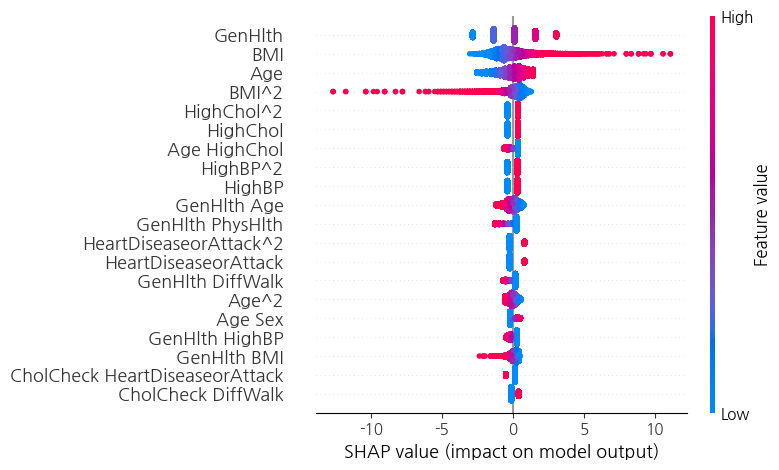

In [ ]:
import shap

# 1. LinearExplainer 사용
explainer = shap.LinearExplainer(final_model, X_train_selected, feature_perturbation="interventional")

# 2. SHAP 값 계산
shap_values = explainer.shap_values(X_val_selected)

# 3. summary_plot (전체 변수 영향 시각화)
shap.summary_plot(shap_values, X_val_selected, feature_names=np.array(poly.get_feature_names_out(feature))[important_idx], plot_size=(8, 4.8))


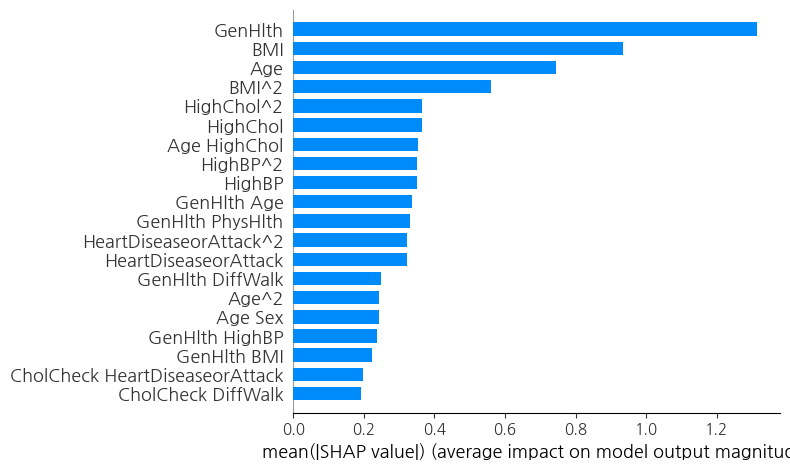

In [ ]:
shap.summary_plot(shap_values, X_val_selected, feature_names=np.array(poly.get_feature_names_out(feature))[important_idx], plot_type='bar', plot_size=(8, 4.8))
# 각 피처의 중요성을 보여주는 것으로 해당 값이 클수록 모델 결과에 미치는 영향이 크다고 볼 수 있음


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 다항 특성 이름 가져오기
feature_names = poly.get_feature_names_out(X_train.columns)

# 2. 선택된 중요 특성 이름 및 계수 값 정리
important_features = [feature_names[i] for i in important_idx]
important_coefs = coef[important_idx]

# 3. DataFrame으로 정리
importance_df = pd.DataFrame({
    'Feature': important_features,
    'Coefficient': important_coefs
})
importance_df['AbsCoef'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='AbsCoef', ascending=False).reset_index(drop = True)
importance_df


,Feature,Coefficient,AbsCoef
0,GenHlth,1.559411,1.559411
1,BMI,1.269163,1.269163
2,Age,0.989832,0.989832
3,BMI^2,-0.831420,0.831420
4,GenHlth PhysHlth,-0.457199,0.457199
5,HeartDiseaseorAttack,0.412232,0.412232
6,HeartDiseaseorAttack^2,0.412232,0.412232
7,GenHlth Age,-0.392916,0.392916
8,Age HighChol,-0.356830,0.356830
9,HighBP^2,0.356001,0.356001


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 다항 특성 이름 가져오기
feature_names = poly.get_feature_names_out(X_train.columns)

# 2. 선택된 중요 특성 이름 및 계수 값 정리
important_features = [feature_names[i] for i in important_idx]
important_coefs = coef[important_idx]

# 3. DataFrame으로 정리
importance_df = pd.DataFrame({
    'Feature': important_features,
    'Coefficient': important_coefs
})
importance_df['AbsCoef'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='AbsCoef', ascending=False)
importance_df


,Feature,Coefficient,AbsCoef
0,GenHlth,1.559411,1.559411
1,BMI,1.269163,1.269163
2,Age,0.989832,0.989832
18,BMI^2,-0.831420,0.831420
16,GenHlth PhysHlth,-0.457199,0.457199
7,HeartDiseaseorAttack,0.412232,0.412232
52,HeartDiseaseorAttack^2,0.412232,0.412232
12,GenHlth Age,-0.392916,0.392916
27,Age HighChol,-0.356830,0.356830
33,HighBP^2,0.356001,0.356001


In [ ]:
importance_df[:16]

,Feature,Coefficient,AbsCoef
0,GenHlth,1.559411,1.559411
1,BMI,1.269163,1.269163
2,Age,0.989832,0.989832
3,BMI^2,-0.831420,0.831420
4,GenHlth PhysHlth,-0.457199,0.457199
5,HeartDiseaseorAttack,0.412232,0.412232
6,HeartDiseaseorAttack^2,0.412232,0.412232
7,GenHlth Age,-0.392916,0.392916
8,Age HighChol,-0.356830,0.356830
9,HighBP^2,0.356001,0.356001


/tmp/ipython-input-32-2839333948.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = importance_df[:16], x = 'Coefficient', y = 'Feature', palette = colors)


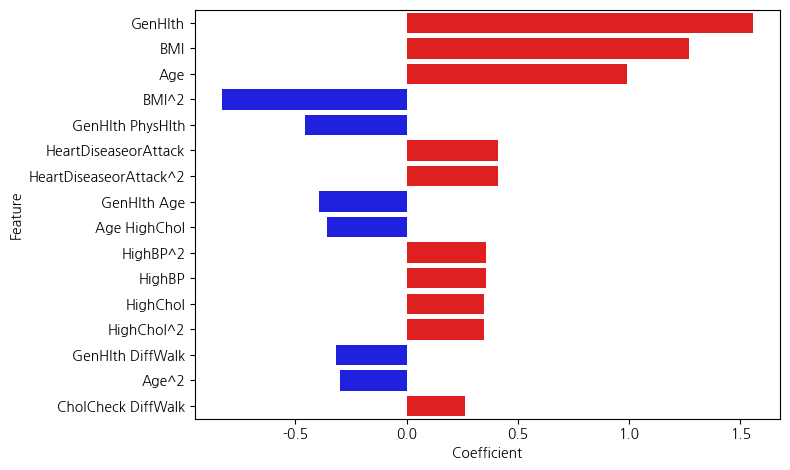

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['red' if c > 0 else 'blue' for c in importance_df['Coefficient'][:16]]


plt.figure(figsize = (8, 4.8))
sns.barplot(data = importance_df[:16], x = 'Coefficient', y = 'Feature', palette = colors)
plt.tight_layout()
plt.show()

/tmp/ipython-input-34-3511537735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = importance_df[:20], x = 'Coefficient', y = 'Feature', palette = colors)


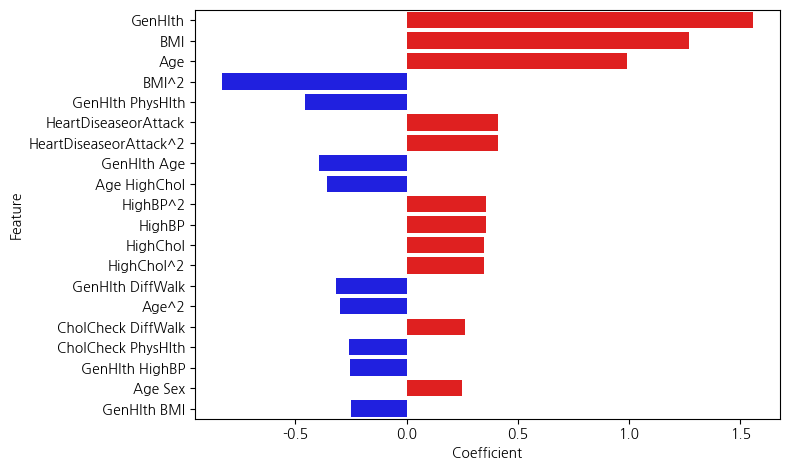

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['red' if c > 0 else 'blue' for c in importance_df['Coefficient'][:20]]


plt.figure(figsize = (8, 4.8))
sns.barplot(data = importance_df[:20], x = 'Coefficient', y = 'Feature', palette = colors)
plt.tight_layout()
plt.show()

### 포트폴리오 작성용 시각화 출력

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 13.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, roc_auc_score, recall_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 1. 데이터 전처리
feature = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck',
           'HvyAlcoholConsump', 'Sex', 'HeartDiseaseorAttack', 'PhysHlth',
           'DiffWalk']
X = train[feature]
y = train['Diabetes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 다항 특성 생성 및 스케일링
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# 3. 중요 변수 선택 (회귀계수 기준)
init_model = LogisticRegression(max_iter=1000, random_state=42)
init_model.fit(X_train_scaled, y_train)
coef = init_model.coef_.flatten()
important_idx = np.where(np.abs(coef) >= 0.05)[0]

X_train_selected = X_train_scaled[:, important_idx]
X_val_selected = X_val_scaled[:, important_idx]

# 4. 최적 하이퍼파라미터 기반 최종 모델 학습 및 예측
best_C = 2.516428151113615
best_solver = 'lbfgs'
best_threshold = 0.3238149824643801

final_model = LogisticRegression(
    C=best_C,
    solver=best_solver,
    penalty='l2',
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train_selected, y_train)

y_val_proba = final_model.predict_proba(X_val_selected)[:, 1]
y_val_pred = (y_val_proba >= best_threshold).astype(int)

# 5. 성능 평가
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\n📄 Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"✅ Final F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"🎯 Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"📈 ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")



📊 Confusion Matrix:
[[3121 2468]
 [ 517 5205]]

📄 Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.56      0.68      5589
         1.0       0.68      0.91      0.78      5722

    accuracy                           0.74     11311
   macro avg       0.77      0.73      0.73     11311
weighted avg       0.77      0.74      0.73     11311

✅ Final F1 Score: 0.7772
🎯 Recall: 0.9096
📈 ROC AUC: 0.8317


In [ ]:
# 1. 전체 다항 특성 이름 가져오기
feature_names = poly.get_feature_names_out(feature)

# 2. 중요 변수 인덱스(회귀계수 절대값 ≥ 0.05)에 해당하는 이름만 선택
selected_feature_names = feature_names[important_idx]

# 3. 중요 변수 이름 출력
print("🎯 선택된 중요 변수 목록:")
for name in selected_feature_names:
    print(" -", name)

# 필요하다면 리스트 형태로 저장도 가능
# print(selected_feature_names.tolist())


🎯 선택된 중요 변수 목록:
 - GenHlth
 - BMI
 - Age
 - HighBP
 - HighChol
 - CholCheck
 - HvyAlcoholConsump
 - HeartDiseaseorAttack
 - PhysHlth
 - DiffWalk
 - GenHlth^2
 - GenHlth BMI
 - GenHlth Age
 - GenHlth HighBP
 - GenHlth Sex
 - GenHlth HeartDiseaseorAttack
 - GenHlth PhysHlth
 - GenHlth DiffWalk
 - BMI^2
 - BMI Age
 - BMI HighChol
 - BMI CholCheck
 - BMI Sex
 - BMI PhysHlth
 - BMI DiffWalk
 - Age^2
 - Age HighBP
 - Age HighChol
 - Age CholCheck
 - Age HvyAlcoholConsump
 - Age Sex
 - Age HeartDiseaseorAttack
 - Age DiffWalk
 - HighBP^2
 - HighBP HighChol
 - HighBP CholCheck
 - HighBP Sex
 - HighBP HeartDiseaseorAttack
 - HighBP DiffWalk
 - HighChol^2
 - HighChol CholCheck
 - HighChol Sex
 - HighChol HeartDiseaseorAttack
 - HighChol DiffWalk
 - CholCheck^2
 - CholCheck HvyAlcoholConsump
 - CholCheck Sex
 - CholCheck HeartDiseaseorAttack
 - CholCheck PhysHlth
 - CholCheck DiffWalk
 - HvyAlcoholConsump^2
 - HvyAlcoholConsump Sex
 - HeartDiseaseorAttack^2
 - HeartDiseaseorAttack DiffWalk
 - Phy

In [ ]:
# 1. 나눔고딕 설치
!apt-get -y install fonts-nanum

# 2. 런타임 재시작 없이 바로 폰트 등록
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 설치된 나눔고딕 폰트 경로 찾기
font_paths = ['/usr/share/fonts/truetype/nanum/NanumGothic.ttf']

# 폰트 등록
for font_path in font_paths:
    fm.fontManager.addfont(font_path)

# 폰트 이름 불러오기
nanum_font = fm.FontProperties(fname=font_paths[0]).get_name()

# matplotlib에 적용
plt.rc('font', family=nanum_font)
plt.rcParams['axes.unicode_minus'] = False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.9 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


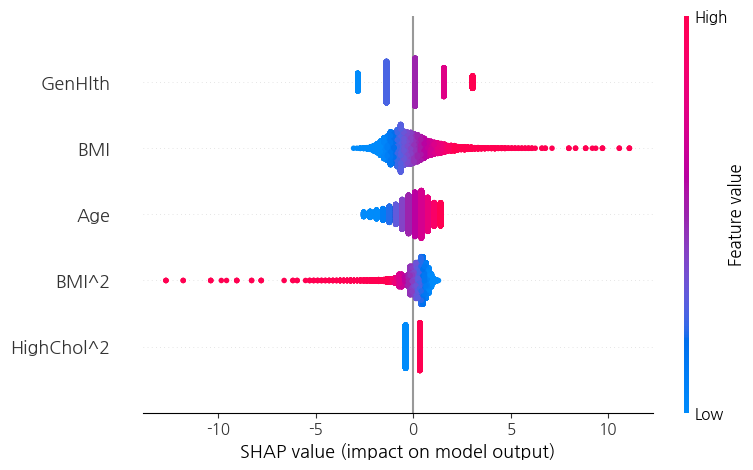

In [ ]:
import shap

# 1. LinearExplainer 사용
explainer = shap.LinearExplainer(final_model, X_train_selected, feature_perturbation="interventional")

# 2. SHAP 값 계산
shap_values = explainer.shap_values(X_val_selected)

# 3. summary_plot (전체 변수 영향 시각화)
shap.summary_plot(shap_values, X_val_selected, feature_names=np.array(poly.get_feature_names_out(feature))[important_idx], plot_size=(8, 4.8), max_display=5)


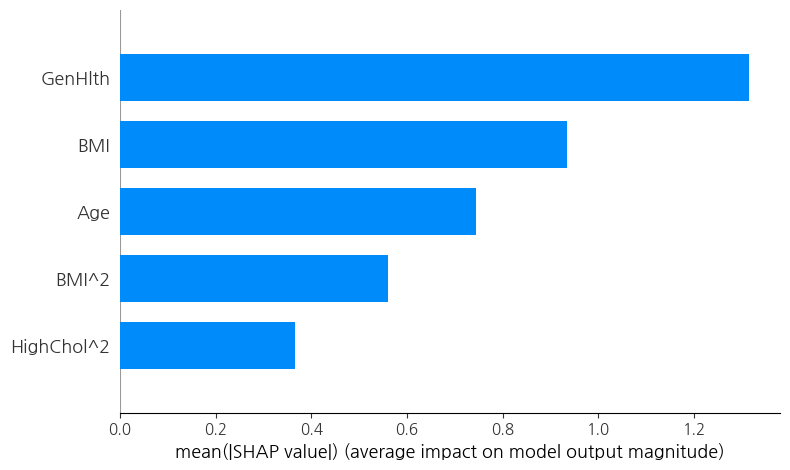

In [ ]:
shap.summary_plot(shap_values, X_val_selected, feature_names=np.array(poly.get_feature_names_out(feature))[important_idx], plot_type='bar', plot_size=(8, 4.8), max_display=5)
# 각 피처의 중요성을 보여주는 것으로 해당 값이 클수록 모델 결과에 미치는 영향이 크다고 볼 수 있음


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 다항 특성 이름 가져오기
feature_names = poly.get_feature_names_out(X_train.columns)

# 2. 선택된 중요 특성 이름 및 계수 값 정리
important_features = [feature_names[i] for i in important_idx]
important_coefs = coef[important_idx]

# 3. DataFrame으로 정리
importance_df = pd.DataFrame({
    'Feature': important_features,
    'Coefficient': important_coefs
})
importance_df['AbsCoef'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='AbsCoef', ascending=False)
importance_df


,Feature,Coefficient,AbsCoef
0,GenHlth,1.559411,1.559411
1,BMI,1.269163,1.269163
2,Age,0.989832,0.989832
18,BMI^2,-0.831420,0.831420
16,GenHlth PhysHlth,-0.457199,0.457199
7,HeartDiseaseorAttack,0.412232,0.412232
52,HeartDiseaseorAttack^2,0.412232,0.412232
12,GenHlth Age,-0.392916,0.392916
27,Age HighChol,-0.356830,0.356830
33,HighBP^2,0.356001,0.356001


/tmp/ipython-input-1136142277.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = importance_df[:5], x = 'Coefficient', y = 'Feature', palette = colors)


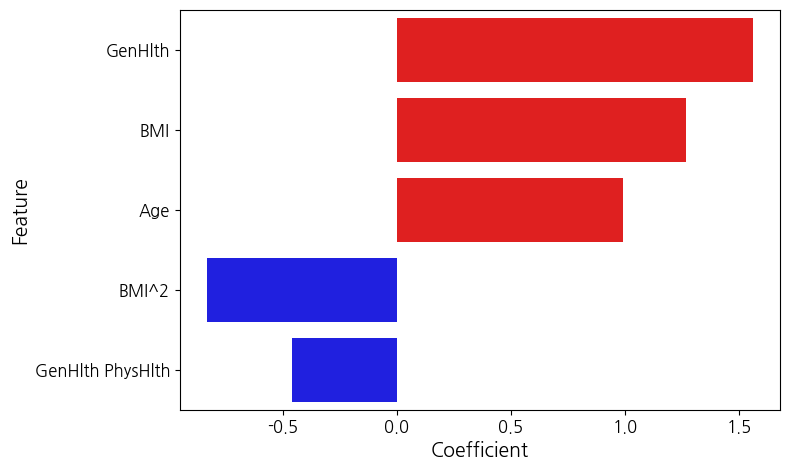

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['red' if c > 0 else 'blue' for c in importance_df['Coefficient'][:5]]


plt.figure(figsize = (8, 4.8))
sns.barplot(data = importance_df[:5], x = 'Coefficient', y = 'Feature', palette = colors)
# 글씨 크기 조정
plt.xlabel("Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()